# Task-03

### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

## <center><font color='Blue'>Analysis of Banking Credit Risk Dataset Using EDA </font></center>


# Table of Contents :
- 1. Introduction
- 2. Importing Required Libraries
- 3. Data Exploration
    - Feature/column Description
    - Missing Value Detection    
    - Important Observations
- 4. Exploratory Data Analysis (EDA)
    - Univariate Analysis 
    - Bivariate Analysis    
- 5. EndNote

## Introduction

>**This Project is about the complete *Exploratory Data Analysis* on a Credit risk data set of Banking domain. Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks"). The objective of the analysis is to assess the success/failure of any banking lending activities.**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Data Exploration

> ### The data set includes information about:



In [2]:

## Impoting/read the data

credit_df = pd.read_csv(r"C:\Users\91998\OneDrive\Assignments\Banking Credit risk case study\data\credit_risk_dataset.csv")
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Knowing the data properties using some functions and methods

In [3]:
## The size of the data we use shape method
credit_df.shape

(32581, 12)

In [4]:
## Knowing column names using columns method
credit_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
## To know the knowledge of data that we have, we will use info() function
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### There are missing values in person_emp_length and loan_int_rate.

In [6]:
#Getting all the unique values in each feature
features = credit_df.columns
for feature in features:
    print(f"{feature} ---> {credit_df[feature].nunique()}")

person_age ---> 58
person_income ---> 4295
person_home_ownership ---> 4
person_emp_length ---> 36
loan_intent ---> 6
loan_grade ---> 7
loan_amnt ---> 753
loan_int_rate ---> 348
loan_status ---> 2
loan_percent_income ---> 77
cb_person_default_on_file ---> 2
cb_person_cred_hist_length ---> 29


In [7]:
## Detection of Missing Values
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### Important Observations:

- By seeing the above values we can conclude that this data set have missing values.
- All column names are correct and datatypes are correct. 
- The size of the data is (32581 * 12). 
- We have 4 categorical and 8 numerical features in this data.

### Missing values Treatment

In [8]:
credit_df["person_emp_length"].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [9]:
credit_df["person_emp_length"].median()

4.0

In [10]:
credit_df["person_emp_length"] = credit_df["person_emp_length"].fillna(credit_df["person_emp_length"].median())

In [11]:
credit_df["loan_int_rate"].unique()

array([16.02, 11.14, 12.87, 15.23, 14.27,  7.14, 12.42, 11.11,  8.9 ,
       14.74, 10.37,  8.63,  7.9 , 18.39, 10.65, 20.25, 18.25, 10.99,
        7.49, 16.77, 17.58,  7.29, 14.54, 12.68, 17.74,  9.32,  9.99,
       12.84, 11.12,  6.62, 14.17, 13.85, 13.49,  7.51, 16.89,   nan,
       17.99, 12.69,  7.88, 19.41, 10.38, 15.33, 16.45, 18.62, 15.96,
       11.48,  5.99, 11.58, 15.7 , 15.99, 14.84, 14.42,  6.99, 13.61,
        9.91, 13.48, 12.98, 13.57, 15.68, 13.06, 15.62, 11.71,  8.88,
       12.18, 13.99,  5.42, 12.73, 11.49, 19.91, 11.83, 14.59,  9.64,
       16.35, 18.67, 10.08, 10.36, 12.23, 16.07, 14.22, 14.79, 13.22,
       11.86, 13.43, 15.28, 17.93,  9.25, 10.62, 18.43, 11.36, 15.65,
       13.04, 17.04, 14.83, 14.65, 16.82, 10.25, 14.96, 11.99,  8.49,
        6.17, 16.32, 14.35, 15.21, 14.09, 17.49, 13.92, 16.49,  5.79,
       13.11,  6.54, 12.53, 15.95, 10.74, 15.27, 14.72, 13.35,  7.68,
       14.46, 13.47,  6.03, 12.92, 18.64, 16.7 , 18.3 ,  9.63, 14.7 ,
       15.37, 14.26,

In [12]:
credit_df["loan_int_rate"] = credit_df["loan_int_rate"].fillna(credit_df["loan_int_rate"].median())

In [13]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Missing Values were treated using fillna with median of that particular column.

# Exploratory Data Analysis


## Numerical Features
### Univariate Analysis on person_age

In [14]:
## Non Vizual Analysis on age feature
print(credit_df["person_age"].min())
print(credit_df["person_age"].max())
print(credit_df["person_age"].mean())
print(credit_df["person_age"].median())
print(credit_df["person_age"].std())

20
144
27.73459992019889
26.0
6.3480784192252475


#### Mean and Median are little closure so we can expect that there may not be outliers.

<Axes: >

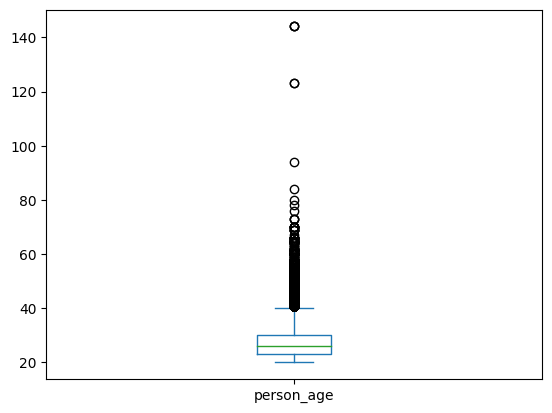

In [15]:
credit_df["person_age"].plot(kind="box")

#### Observation: We have so many outliers in the age column. The customers those who are above the 40 years of age are the outliers we have. Those who are having the age more that 100, they might be fraud or they might be wrong entry or It could be a institution or company which is classified as a person.

In [16]:
cleaned_credit_df = credit_df[(credit_df["person_age"] < 70)]
print(cleaned_credit_df.shape)
print(credit_df.shape)

(32561, 12)
(32581, 12)


#### 20 data points were removed 

In [17]:
age_q1 = credit_df["person_age"].quantile(0.25)
age_q3 = credit_df["person_age"].quantile(0.75)
IQR = age_q3 - age_q1
age_lower_bound = age_q1 - 1.5 * IQR
age_upper_bound = age_q3 + 1.5 * IQR

In [18]:
cleaned_credit_df = credit_df[(credit_df["person_age"] > age_lower_bound) & (credit_df["person_age"] < age_upper_bound)]
print(cleaned_credit_df.shape)
print(credit_df.shape)

(31087, 12)
(32581, 12)


<Axes: >

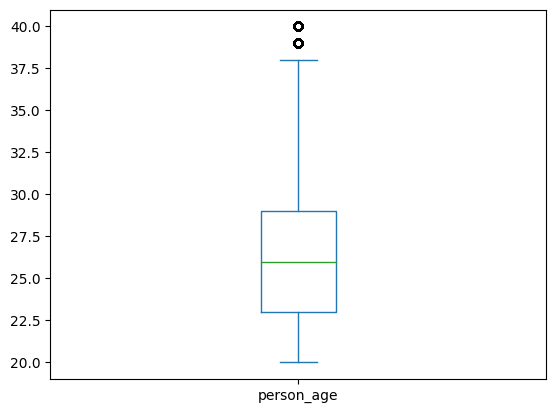

In [19]:
cleaned_credit_df["person_age"].plot(kind = "box")

In [20]:
cleaned_credit_df = credit_df[(credit_df["person_age"] < 38)]
print(cleaned_credit_df.shape)
print(credit_df.shape)

(30141, 12)
(32581, 12)


In [21]:
## Non Vizual Analysis on age feature
print(cleaned_credit_df["person_age"].min())
print(cleaned_credit_df["person_age"].max())
print(cleaned_credit_df["person_age"].mean())
print(cleaned_credit_df["person_age"].median())
print(cleaned_credit_df["person_age"].std())

20
37
26.43389403138582
25.0
4.053300873533287


<Axes: >

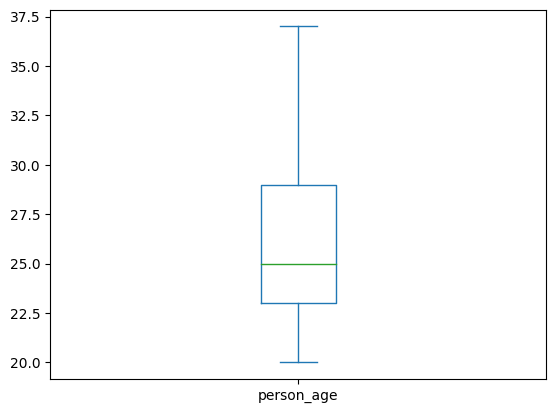

In [22]:
cleaned_credit_df["person_age"].plot(kind="box")

### if we we remove all the outliers from age 1400 data points will be removed removed.

### Univariate Analysis on Person_income

In [23]:
## Non Vizual Analysis on bmi feature
print(cleaned_credit_df["person_income"].min())
print(cleaned_credit_df["person_income"].max())
print(cleaned_credit_df["person_income"].mean())
print(cleaned_credit_df["person_income"].median())
print(cleaned_credit_df["person_income"].std())

4080
1200000
64782.172953783884
55000.0
45324.864808255275


<Axes: >

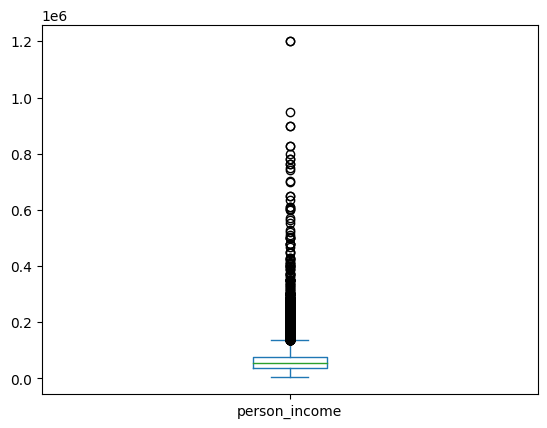

In [24]:
cleaned_credit_df["person_income"].plot(kind="box")

In [25]:
income_q1 = cleaned_credit_df["person_income"].quantile(0.25)
income_q3 = cleaned_credit_df["person_income"].quantile(0.75)
IQR = income_q3 - income_q1
income_lower_bound = income_q1 - 1.5 * IQR
income_upper_bound = income_q3 + 1.5 * IQR

In [26]:
cleaned_credit_df = cleaned_credit_df[(cleaned_credit_df["person_income"] > income_lower_bound) & (cleaned_credit_df["person_income"] < income_upper_bound)]
print(cleaned_credit_df.shape)
print(credit_df.shape)

(28696, 12)
(32581, 12)


#### Most of the people have below 9,00,000 income. They might be under credit risk.

<Axes: >

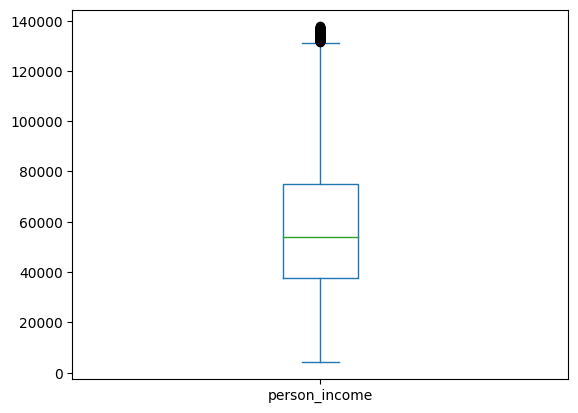

In [27]:
cleaned_credit_df["person_income"].plot(kind="box")

In [28]:
cleaned_credit_df = cleaned_credit_df[(cleaned_credit_df["person_income"] < 125000)]
print(cleaned_credit_df.shape)
print(credit_df.shape)

(28133, 12)
(32581, 12)


<Axes: >

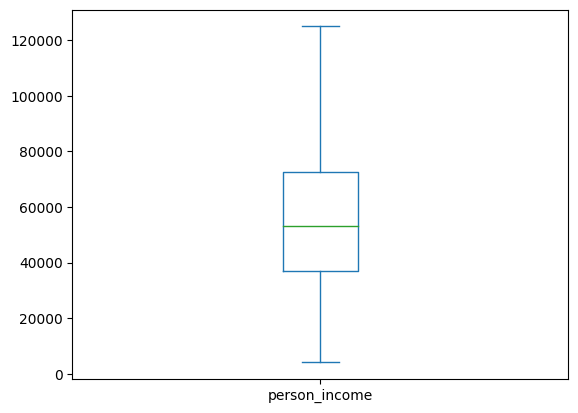

In [29]:
cleaned_credit_df["person_income"].plot(kind="box")

### Univariate Analysis on Loan amount

In [31]:
## Non-Vizual Analysis on TotalCharges feature

print(cleaned_credit_df["loan_amnt"].min())
print(cleaned_credit_df["loan_amnt"].max())
print(cleaned_credit_df["loan_amnt"].mean())
print(cleaned_credit_df["loan_amnt"].median())
print(cleaned_credit_df["loan_amnt"].std())

500
35000
9151.336508726406
8000.0
5923.119538687211


<Axes: >

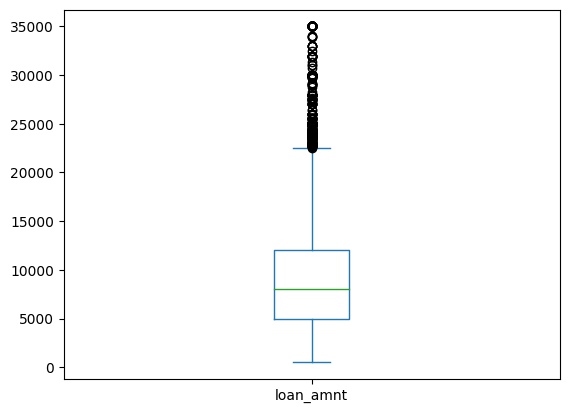

In [32]:

cleaned_credit_df["loan_amnt"].plot(kind = "box")

### Most of the customers have the loan income below 25,000.

<Axes: >

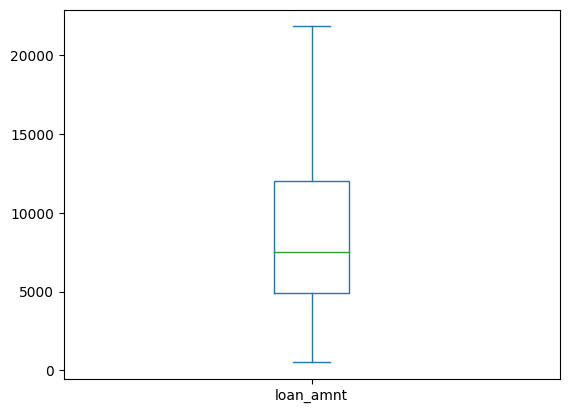

In [35]:

cleaned_credit_df["loan_amnt"].plot(kind = "box")

### Univariate analysis on loan_int_rate.

In [36]:
print(cleaned_credit_df["loan_int_rate"].min())
print(cleaned_credit_df["loan_int_rate"].max())
print(cleaned_credit_df["loan_int_rate"].mean())
print(cleaned_credit_df["loan_int_rate"].median())
print(cleaned_credit_df["loan_int_rate"].std())

5.42
22.11
10.915239545419931
10.99
3.0478127408738325


<Axes: >

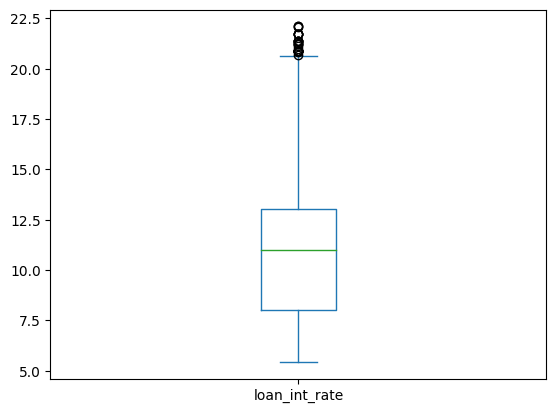

In [37]:
cleaned_credit_df["loan_int_rate"].plot(kind="box")

### Most of cutomer's loan interest rate is under 20%

In [38]:
cleaned_credit_df = cleaned_credit_df[(cleaned_credit_df["loan_int_rate"] < 21)]
print(cleaned_credit_df.shape)
print(credit_df.shape)

(26908, 12)
(32581, 12)


In [39]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [40]:
print(cleaned_credit_df["loan_percent_income"].min())
print(cleaned_credit_df["loan_percent_income"].max())
print(cleaned_credit_df["loan_percent_income"].mean())
print(cleaned_credit_df["loan_percent_income"].median())
print(cleaned_credit_df["loan_percent_income"].std())

0.01
0.83
0.16928013973539882
0.15
0.10254764857949736


<Axes: >

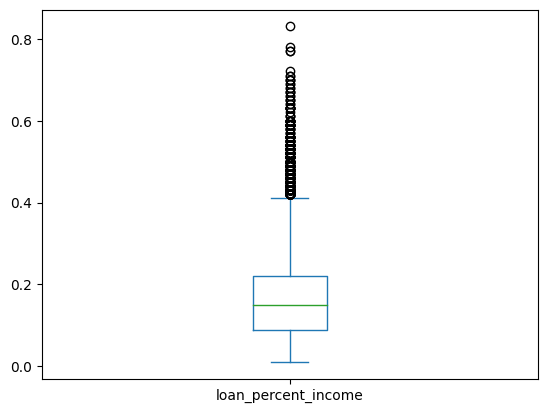

In [41]:
cleaned_credit_df["loan_percent_income"].plot(kind="box")

### Most of the Customers have Income perccent below 0.5.

In [42]:
cleaned_credit_df = cleaned_credit_df[(cleaned_credit_df["loan_percent_income"] < 0.4)]
print(cleaned_credit_df.shape)
print(credit_df.shape)

(25956, 12)
(32581, 12)


<Axes: >

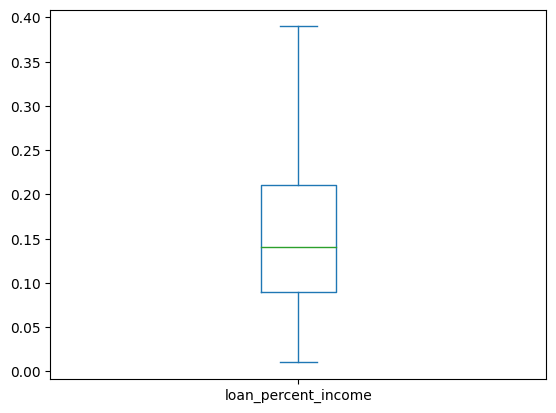

In [43]:
cleaned_credit_df["loan_percent_income"].plot(kind="box")

### Bivariate Analysis
#### Categorical Vs Numerical

<Axes: title={'center': 'person_age'}, xlabel='loan_status'>

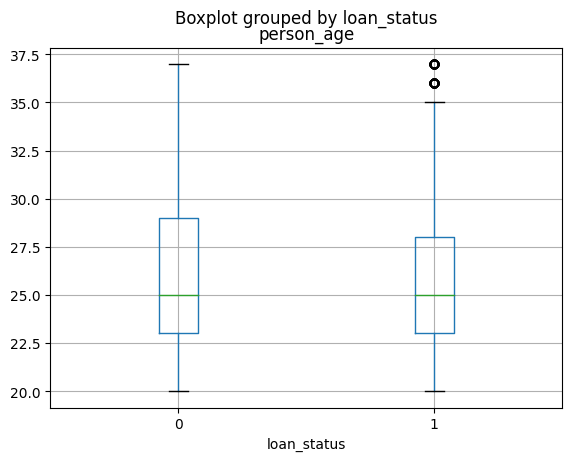

In [44]:
cleaned_credit_df.boxplot(by="loan_status",column="person_age")

### Age doesn't have much impact on loan status.

<Axes: title={'center': 'person_income'}, xlabel='loan_status'>

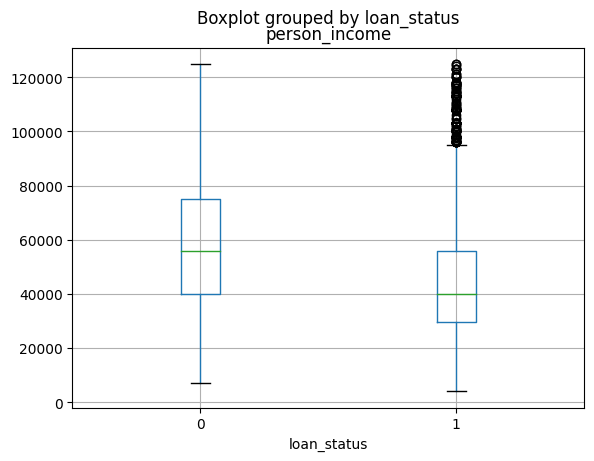

In [45]:
cleaned_credit_df.boxplot(by="loan_status",column="person_income")

<Axes: title={'center': 'person_emp_length'}, xlabel='loan_status'>

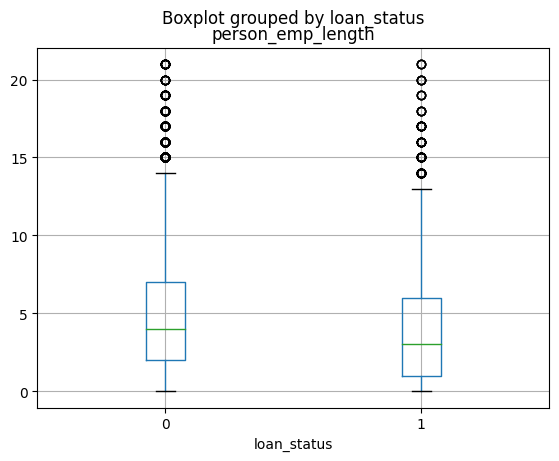

In [46]:
cleaned_credit_df.boxplot(by="loan_status",column="person_emp_length")

<Axes: title={'center': 'loan_amnt'}, xlabel='loan_status'>

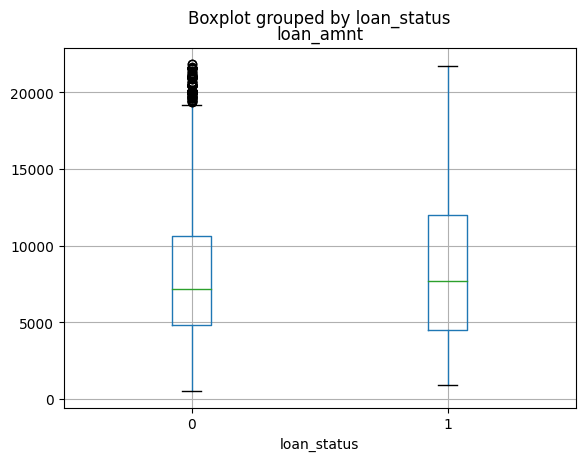

In [47]:
cleaned_credit_df.boxplot(by="loan_status",column="loan_amnt")

<Axes: title={'center': 'loan_int_rate'}, xlabel='loan_status'>

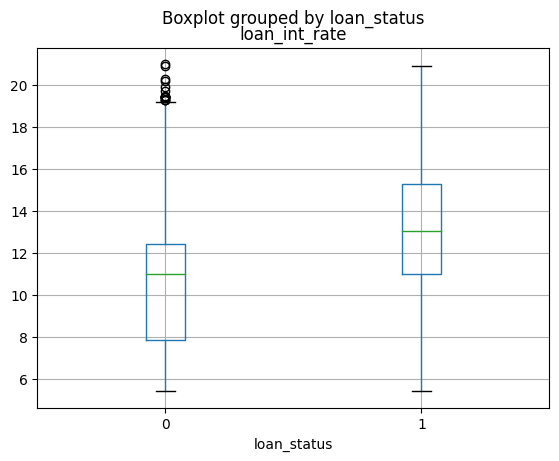

In [48]:
cleaned_credit_df.boxplot(by="loan_status",column="loan_int_rate")

<Axes: title={'center': 'loan_percent_income'}, xlabel='loan_status'>

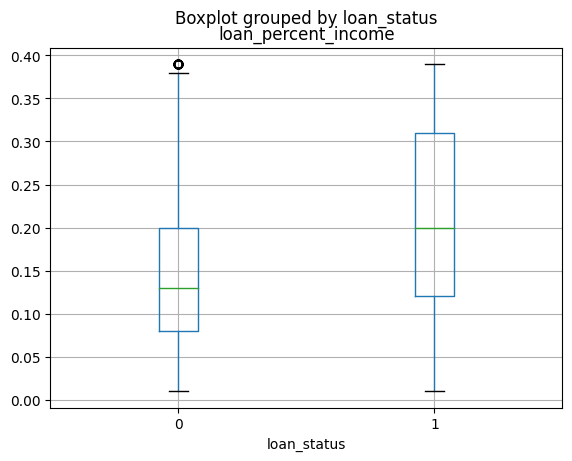

In [49]:
cleaned_credit_df.boxplot(by="loan_status",column="loan_percent_income")

<Axes: title={'center': 'cb_person_cred_hist_length'}, xlabel='loan_status'>

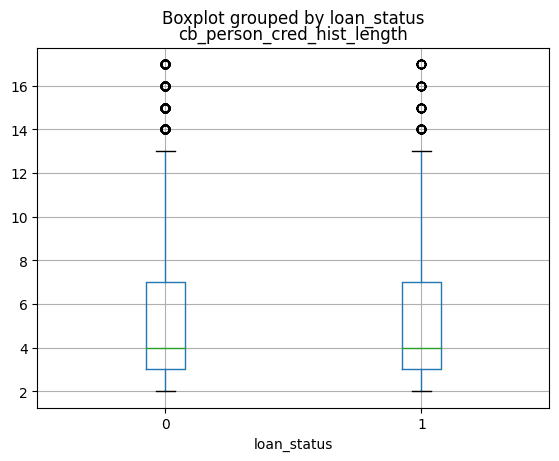

In [50]:
cleaned_credit_df.boxplot(by="loan_status",column="cb_person_cred_hist_length")

### Categorical Vs Categorical

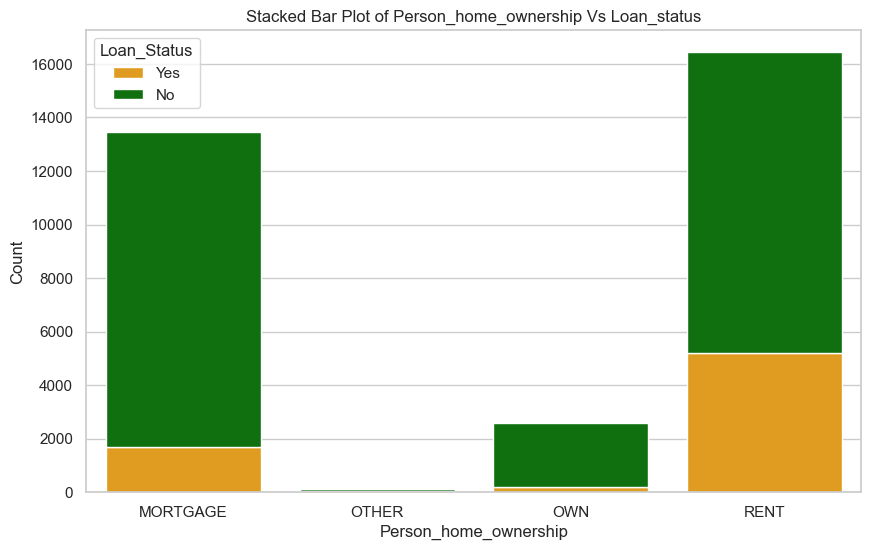

In [51]:
## Analysing the relation ship between PaymentMethod vs churn
# Set the plot style
sns.set(style="whitegrid")

# Create a cross-tabulation of Gender and Churn categories
cross_tab = pd.crosstab(credit_df['person_home_ownership'], credit_df['loan_status'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cross_tab.index, y=cross_tab[1], color='orange', label='Yes')
sns.barplot(x=cross_tab.index, y=cross_tab[0], bottom=cross_tab[1], color='green', label='No')

# Set labels and title
plt.xlabel('Person_home_ownership')
plt.ylabel('Count')
plt.xticks()
plt.title('Stacked Bar Plot of Person_home_ownership Vs Loan_status')

# Add a legend
plt.legend(title='Loan_Status')

# Show the plot
plt.show()

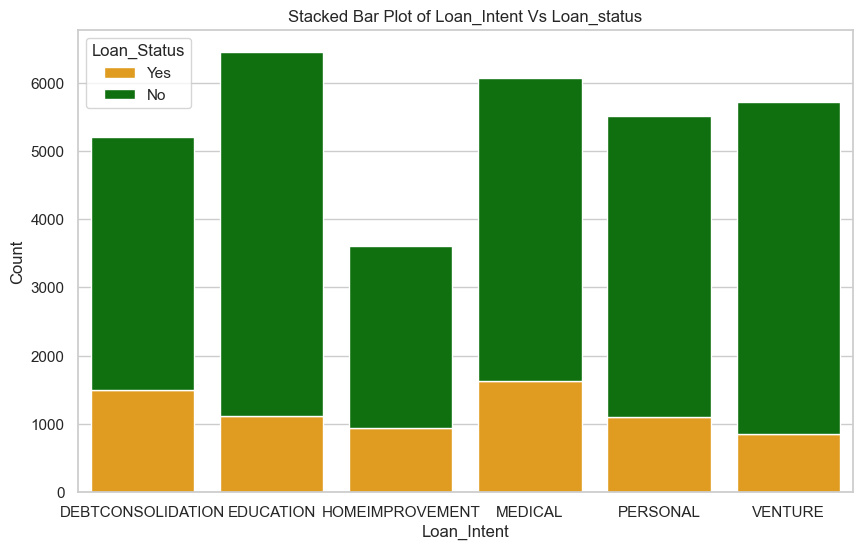

In [52]:
## Analysing the relation ship between PaymentMethod vs churn
# Set the plot style
sns.set(style="whitegrid")

# Create a cross-tabulation of Gender and Churn categories
cross_tab = pd.crosstab(credit_df["loan_intent"], credit_df['loan_status'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cross_tab.index, y=cross_tab[1], color='orange', label='Yes')
sns.barplot(x=cross_tab.index, y=cross_tab[0], bottom=cross_tab[1], color='green', label='No')

# Set labels and title
plt.xlabel('Loan_Intent')
plt.ylabel('Count')
plt.xticks()
plt.title('Stacked Bar Plot of Loan_Intent Vs Loan_status')

# Add a legend
plt.legend(title='Loan_Status')

# Show the plot
plt.show()

### DebtConsolidation and Medical debt customers have high credit risk comparative others.

### Bivariate Analysis on loan_grade VS loan_status

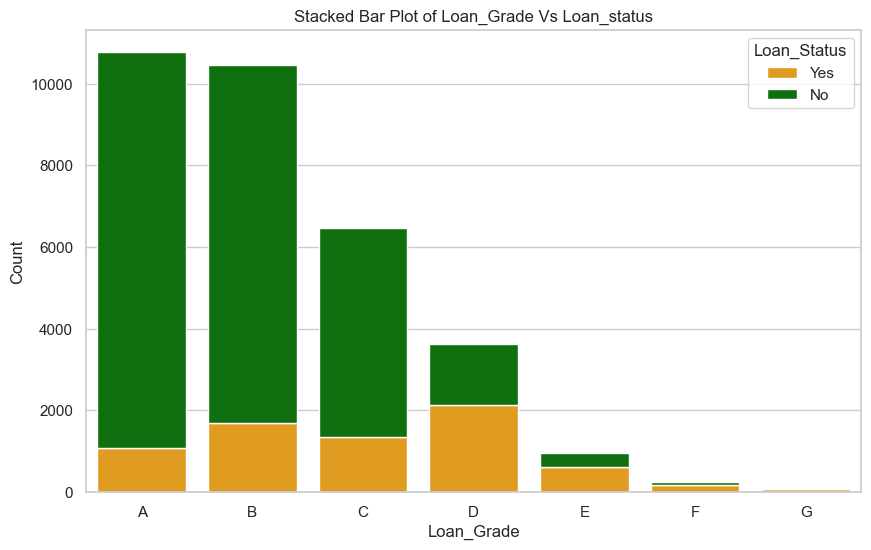

In [53]:
sns.set(style="whitegrid")

# Create a cross-tabulation of Gender and Churn categories
cross_tab = pd.crosstab(credit_df["loan_grade"], credit_df['loan_status'])

# Plot the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cross_tab.index, y=cross_tab[1], color='orange', label='Yes')
sns.barplot(x=cross_tab.index, y=cross_tab[0], bottom=cross_tab[1], color='green', label='No')

# Set labels and title
plt.xlabel('Loan_Grade')
plt.ylabel('Count')
plt.xticks()
plt.title('Stacked Bar Plot of Loan_Grade Vs Loan_status')

# Add a legend
plt.legend(title='Loan_Status')

# Show the plot
plt.show()

### comparatively there more dafulat customers in B,C,D,E. 

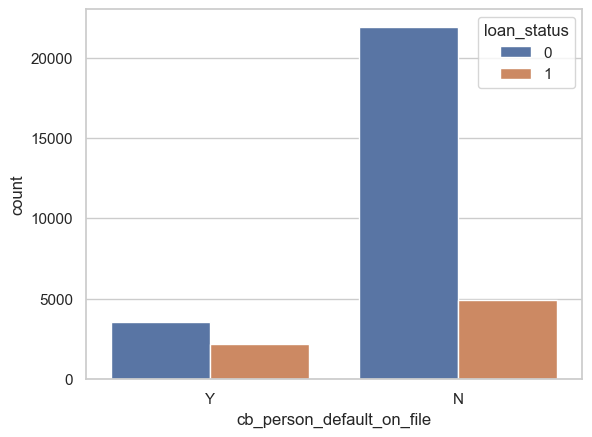

In [54]:
sns.countplot(data=credit_df,x="cb_person_default_on_file",hue='loan_status')
plt.show()

## Based on the credit history Only bank can guess the credit risk of the borrower. so the customers who don't have the credit history they have high credit risk.

C:\Users\91998\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


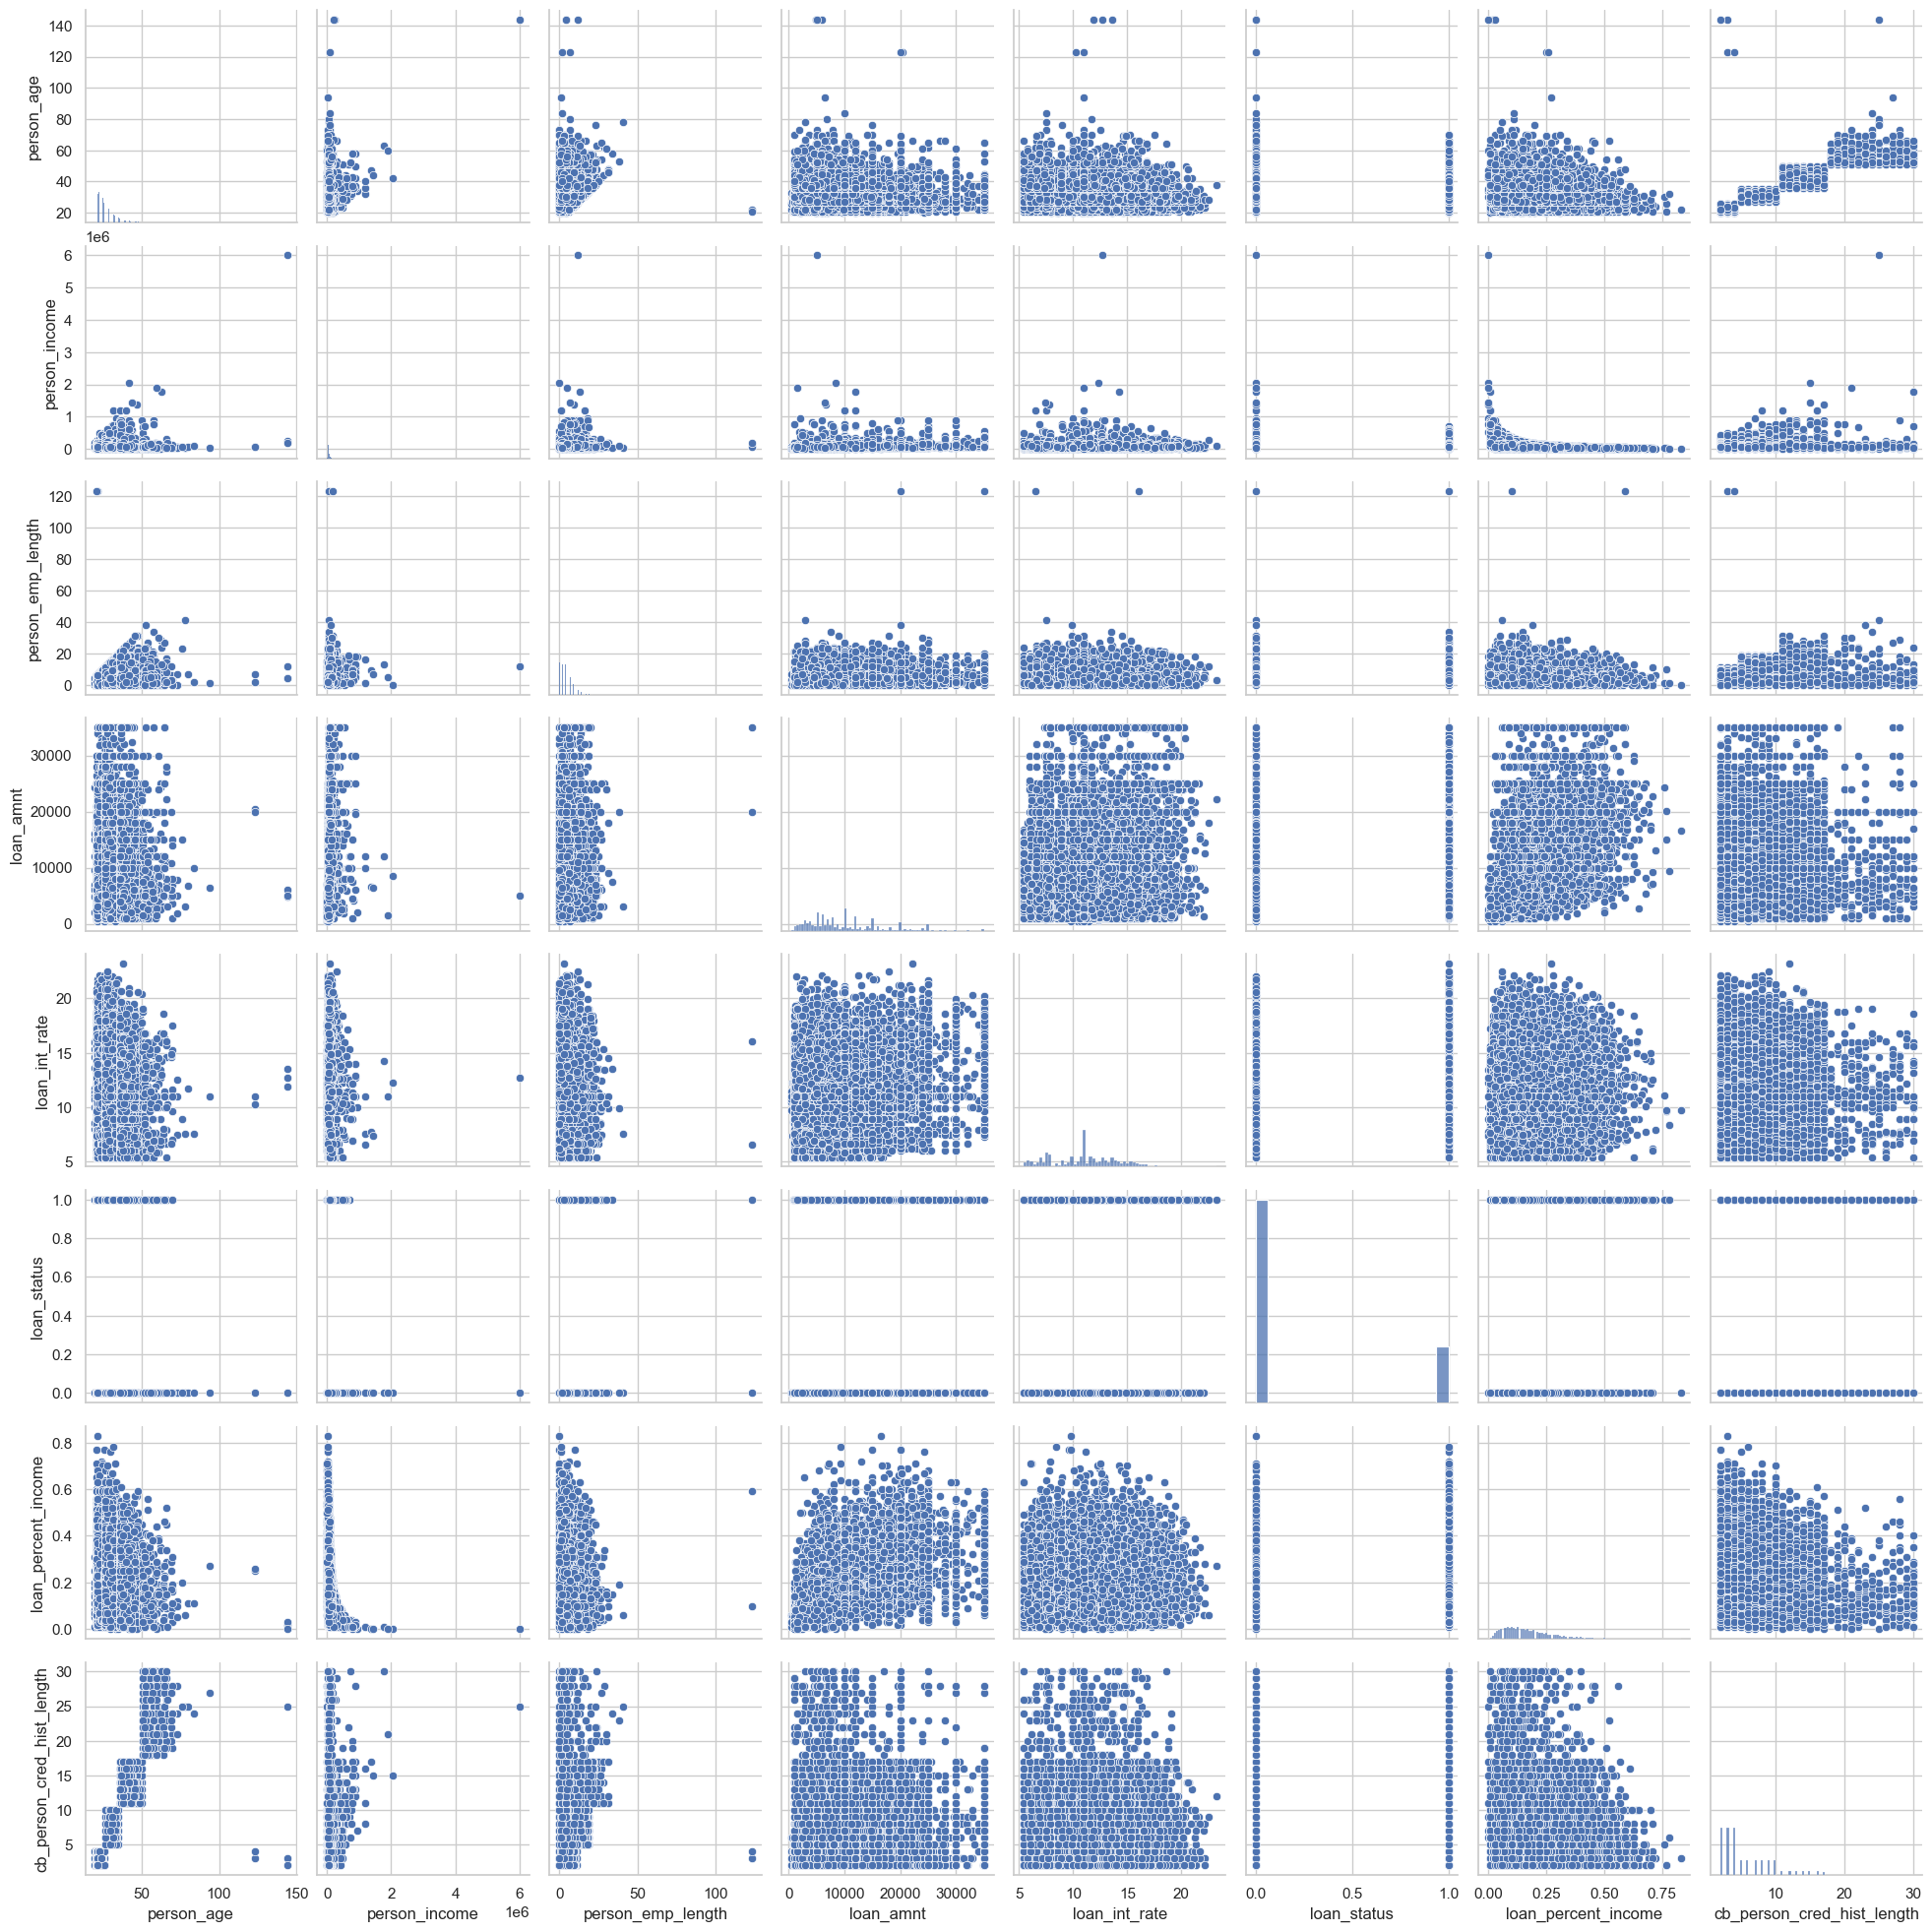

In [55]:
sns.pairplot(credit_df)
plt.show()

### Observations
#### As per Scatter plot, the variable Age has non – linear correlation with all other numerical variables except Credit history length. There is no fixed pattern.
#### As per Scatter plot, the variable Annual Income has non – linear correlation with all other numerical variables. There is no fixed pattern.

In [56]:
cleaned_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25956 entries, 1 to 32294
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  25956 non-null  int64  
 1   person_income               25956 non-null  int64  
 2   person_home_ownership       25956 non-null  object 
 3   person_emp_length           25956 non-null  float64
 4   loan_intent                 25956 non-null  object 
 5   loan_grade                  25956 non-null  object 
 6   loan_amnt                   25956 non-null  int64  
 7   loan_int_rate               25956 non-null  float64
 8   loan_status                 25956 non-null  int64  
 9   loan_percent_income         25956 non-null  float64
 10  cb_person_default_on_file   25956 non-null  object 
 11  cb_person_cred_hist_length  25956 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.6+ MB


### Data PreProcessing

In [57]:
### step1: Identifying input and output values 
y = cleaned_credit_df["loan_status"]
X = cleaned_credit_df[["person_income","person_home_ownership","loan_intent","loan_grade","loan_amnt","loan_int_rate",
                       "loan_percent_income","cb_person_default_on_file","cb_person_cred_hist_length"]]

In [58]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=40)

In [59]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19467, 9) (19467,)
(6489, 9) (6489,)


In [60]:
X_train.dtypes

person_income                   int64
person_home_ownership          object
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### Seperating Numerical and Categorical Columns

In [61]:
X_train_cat = X_train.select_dtypes(include="object")
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
19198,RENT,VENTURE,A,N
12628,MORTGAGE,EDUCATION,B,N
4933,RENT,DEBTCONSOLIDATION,B,N
4766,MORTGAGE,VENTURE,B,N
7818,RENT,DEBTCONSOLIDATION,F,Y


In [62]:
X_train_num = X_train.select_dtypes(include=["int64","float64"])
X_train_num.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
19198,74984,13500,7.29,0.18,9
12628,84000,2500,9.99,0.03,4
4933,40000,5000,11.36,0.13,4
4766,42000,3500,10.36,0.08,2
7818,34320,7000,18.30,0.20,3


### Scaling Numerical Features

In [63]:
### Applying standardization on Numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                      columns = X_train_num.columns,
                                      index=X_train_num.index)
X_train_num_transformed.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
19198,0.757987,1.120292,-1.183845,0.243260,1.361261
12628,1.125325,-1.213882,-0.296614,-1.488621,-0.327864
4933,-0.667365,-0.683388,0.153573,-0.334034,-0.327864
4766,-0.585879,-1.001684,-0.175031,-0.911327,-1.003514
7818,-0.898785,-0.258992,2.434083,0.474177,-0.665689


### One Hot Encoding on Categorical features

In [64]:
### Applying One_hot Encoding on Categorical Columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                                      columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
19198,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [65]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_ohe],axis=1)
X_train_transformed.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
19198,0.757987,1.120292,-1.183845,0.243260,1.361261,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12628,1.125325,-1.213882,-0.296614,-1.488621,-0.327864,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4933,-0.667365,-0.683388,0.153573,-0.334034,-0.327864,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4766,-0.585879,-1.001684,-0.175031,-0.911327,-1.003514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7818,-0.898785,-0.258992,2.434083,0.474177,-0.665689,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Data Preparation on data

In [66]:
### Separating categorical and Numerical features
X_test_cat = X_test.select_dtypes(include="object")
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
26937,RENT,PERSONAL,C,Y
4013,MORTGAGE,EDUCATION,C,N
23609,MORTGAGE,DEBTCONSOLIDATION,B,N
3154,MORTGAGE,MEDICAL,B,N
874,MORTGAGE,EDUCATION,D,Y


In [67]:
X_test_num = X_test.select_dtypes(include=["int64","float64"])
X_test_num.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26937,48500,15000,12.87,0.31,8
4013,39996,13000,13.48,0.33,2
23609,65000,20000,11.71,0.31,9
3154,36000,12000,11.71,0.33,2
874,23000,7000,14.96,0.30,3


In [68]:
## rescaling the test data
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num),
                                                       columns = X_test_num.columns, 
                                   index = X_test_num.index)
X_test_num_transformed.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26937,-0.321050,1.438589,0.649764,1.744223,1.023436
4013,-0.667528,1.014193,0.850213,1.975140,-1.003514
23609,0.351209,2.499577,0.268584,1.744223,1.361261
3154,-0.830336,0.801996,0.268584,1.975140,-1.003514
874,-1.359995,-0.258992,1.336546,1.628764,-0.665689


In [69]:
## Applying one-hot encoding on Test data
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                            columns=encoder.get_feature_names_out(X_train_cat.columns),
                             index=X_test_cat.index)
X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
26937,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3154,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
874,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
## combining two test transformed data frames
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
26937,-0.321050,1.438589,0.649764,1.744223,1.023436,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4013,-0.667528,1.014193,0.850213,1.975140,-1.003514,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23609,0.351209,2.499577,0.268584,1.744223,1.361261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3154,-0.830336,0.801996,0.268584,1.975140,-1.003514,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
874,-1.359995,-0.258992,1.336546,1.628764,-0.665689,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Decision Tree Classifier

In [71]:
### Building Model om Train data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [76]:
## Prediction
y_test_predict = classifier.predict(X_test_transformed)

In [77]:
### Evaluation
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_predict)

0.8687008784096163

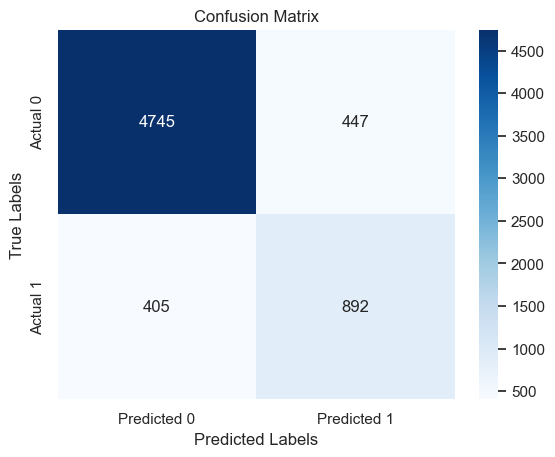

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      5192
           1       0.67      0.69      0.68      1297

    accuracy                           0.87      6489
   macro avg       0.79      0.80      0.80      6489
weighted avg       0.87      0.87      0.87      6489



In [79]:
from sklearn.metrics import confusion_matrix, classification_report
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_predict)

# Display confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_test_predict))